Import Libraries & Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [3]:
df = pd.read_excel("Uber_Request_Data_Cleaned.xlsx")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Hour,Request Day,Time Slot,Trip Completed
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11-07-2016 13:00,11-07-2016,11:51:00,11-07-2016,13:00:00,11,Monday,Morning,True
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11-07-2016 18:47,11-07-2016,17:57:00,11-07-2016,18:47:00,17,Monday,Evening,True
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12-07-2016 09:58,12-07-2016,09:17:00,12-07-2016,09:58:00,9,Tuesday,Morning,True
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12-07-2016 22:03,12-07-2016,21:08:00,12-07-2016,22:03:00,21,Tuesday,Night,True
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,13-07-2016 09:25,13-07-2016,08:33:16,13-07-2016,09:25:47,8,Wednesday,Morning,True


Preprocessing

Convert timestamps to datetime

In [17]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], errors='coerce')  # drop can be NaT

Create new time-based columns

In [18]:
df['hour'] = df['Request timestamp'].dt.hour
df['date'] = df['Request timestamp'].dt.date

Define custom time slots

In [19]:
def get_timeslot(hour):
    if 0 <= hour < 4:
        return 'Late Night'
    elif 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

In [20]:
df['time_slot'] = df['hour'].apply(get_timeslot)

In [21]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Hour,Request Day,Time Slot,Trip Completed,hour,date,time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-11-07 13:00:00,11-07-2016,11:51:00,11-07-2016,13:00:00,11,Monday,Morning,True,11,2016-07-11,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-11-07 18:47:00,11-07-2016,17:57:00,11-07-2016,18:47:00,17,Monday,Evening,True,17,2016-07-11,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-12-07 09:58:00,12-07-2016,09:17:00,12-07-2016,09:58:00,9,Tuesday,Morning,True,9,2016-07-12,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-12-07 22:03:00,12-07-2016,21:08:00,12-07-2016,22:03:00,21,Tuesday,Night,True,21,2016-07-12,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,NaT,13-07-2016,08:33:16,13-07-2016,09:25:47,8,Wednesday,Morning,True,8,2016-07-13,Morning


Request status distribution

In [22]:
print(df['Status'].value_counts())

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64


Pickup point counts

In [23]:
print(df['Pickup point'].value_counts())

Pickup point
City       3507
Airport    3238
Name: count, dtype: int64


Visualizations

📊 Requests by Hour

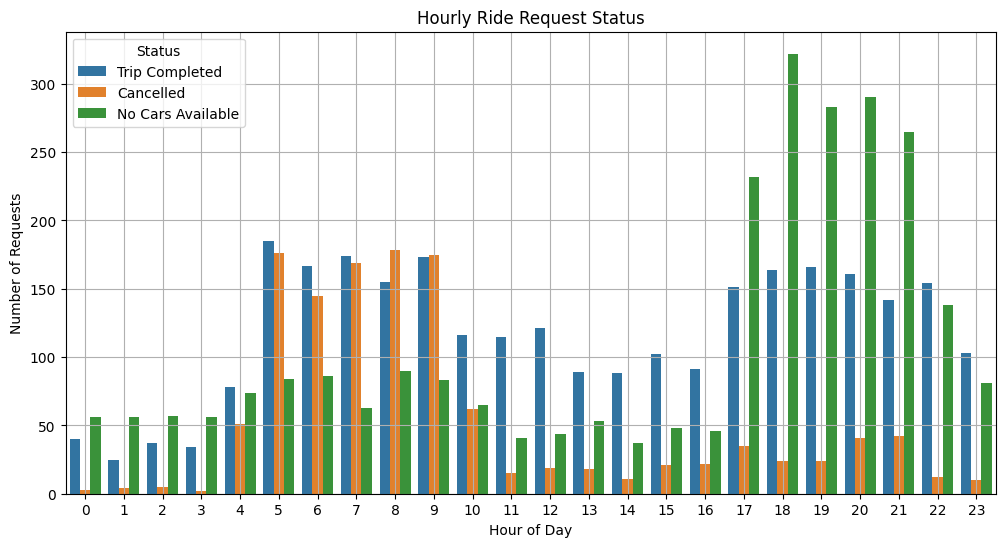

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour', hue='Status')
plt.title('Hourly Ride Request Status')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.legend(title='Status')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

📊 Requests by Time Slot

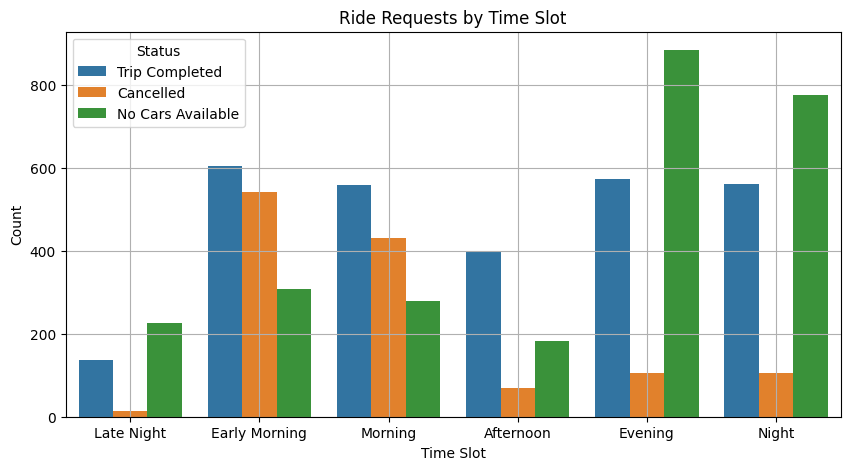

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='time_slot', hue='Status', order=['Late Night','Early Morning','Morning','Afternoon','Evening','Night'])
plt.title('Ride Requests by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Count')
plt.legend(title='Status')
plt.grid(True)
plt.show()


📍 Pickup Point vs Status

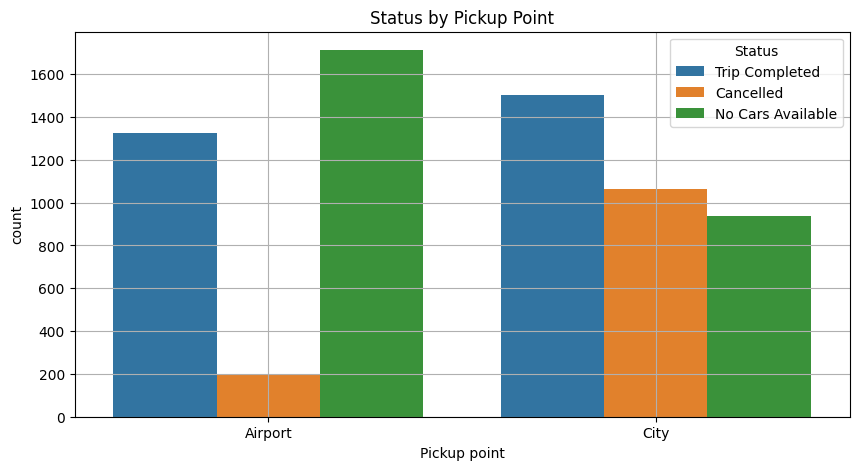

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Pickup point', hue='Status')
plt.title('Status by Pickup Point')
plt.grid(True)
plt.show()


🔥 Heatmap: Pickup Point vs Time Slot

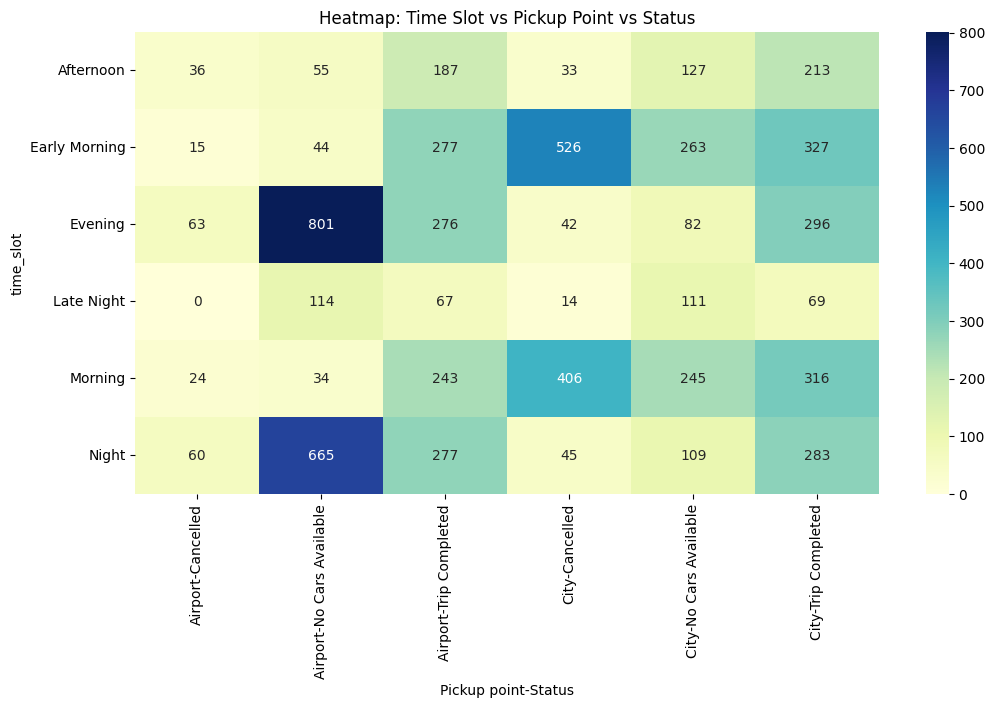

In [13]:
heatmap_data = pd.crosstab(index=df['time_slot'], columns=[df['Pickup point'], df['Status']])
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Time Slot vs Pickup Point vs Status')
plt.show()


Key Insights Extraction

Total requests

In [24]:
total_requests = len(df)

% of cancelled and no cars

In [25]:
cancelled_pct = df[df['Status'] == 'Cancelled'].shape[0] / total_requests * 100
no_cars_pct = df[df['Status'] == 'No Cars Available'].shape[0] / total_requests * 100

print(f"Cancelled Rides: {cancelled_pct:.2f}%")
print(f"No Cars Available: {no_cars_pct:.2f}%")

Cancelled Rides: 18.74%
No Cars Available: 39.29%


In [ ]:
Status by time slot

In [26]:
status_by_slot = df.groupby(['time_slot', 'Status']).size().unstack().fillna(0)
print(status_by_slot)

Status         Cancelled  No Cars Available  Trip Completed
time_slot                                                  
Afternoon             69                182             400
Early Morning        541                307             604
Evening              105                883             572
Late Night            14                225             136
Morning              430                279             559
Night                105                774             560


In [15]:
df.to_csv("Uber_Data_with_Timeslot.csv", index=False)